In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint

In [3]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [4]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [5]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [16]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/iplab/Cancer_predicton/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [17]:
filenames


['ISIC_0000002.jpg',
 'ISIC_0000004.jpg',
 'ISIC_0000013.jpg',
 'ISIC_0000022.jpg',
 'ISIC_0000026.jpg',
 'ISIC_0000029.jpg',
 'ISIC_0000030.jpg',
 'ISIC_0000031.jpg',
 'ISIC_0000035.jpg',
 'ISIC_0000036.jpg',
 'ISIC_0000040.jpg',
 'ISIC_0000043.jpg',
 'ISIC_0000046.jpg',
 'ISIC_0000049.jpg',
 'ISIC_0000054.jpg',
 'ISIC_0000056.jpg',
 'ISIC_0000074.jpg',
 'ISIC_0000077.jpg',
 'ISIC_0000078.jpg',
 'ISIC_0000139.jpg',
 'ISIC_0000140.jpg',
 'ISIC_0000141.jpg',
 'ISIC_0000142.jpg',
 'ISIC_0000143.jpg',
 'ISIC_0000145.jpg',
 'ISIC_0000146.jpg',
 'ISIC_0000147.jpg',
 'ISIC_0000148.jpg',
 'ISIC_0000149.jpg',
 'ISIC_0000150.jpg',
 'ISIC_0000151.jpg',
 'ISIC_0000152.jpg',
 'ISIC_0000153.jpg',
 'ISIC_0000154.jpg',
 'ISIC_0000155.jpg',
 'ISIC_0000156.jpg',
 'ISIC_0000157.jpg',
 'ISIC_0000159.jpg',
 'ISIC_0000160.jpg',
 'ISIC_0000161.jpg',
 'ISIC_0000162.jpg',
 'ISIC_0000163.jpg',
 'ISIC_0000164.jpg',
 'ISIC_0000165.jpg',
 'ISIC_0000166.jpg',
 'ISIC_0000167.jpg',
 'ISIC_0000169.jpg',
 'ISIC_000017

In [26]:
melanoma_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    
    melanoma_images.append(image)
    print(filename)

ISIC_0000002.jpg
ISIC_0000004.jpg
ISIC_0000013.jpg
ISIC_0000022.jpg
ISIC_0000026.jpg
ISIC_0000029.jpg
ISIC_0000030.jpg
ISIC_0000031.jpg
ISIC_0000035.jpg
ISIC_0000036.jpg
ISIC_0000040.jpg
ISIC_0000043.jpg
ISIC_0000046.jpg
ISIC_0000049.jpg
ISIC_0000054.jpg
ISIC_0000056.jpg
ISIC_0000074.jpg
ISIC_0000077.jpg
ISIC_0000078.jpg
ISIC_0000139.jpg
ISIC_0000140.jpg
ISIC_0000141.jpg
ISIC_0000142.jpg
ISIC_0000143.jpg
ISIC_0000145.jpg
ISIC_0000146.jpg
ISIC_0000147.jpg
ISIC_0000148.jpg
ISIC_0000149.jpg
ISIC_0000150.jpg
ISIC_0000151.jpg
ISIC_0000152.jpg
ISIC_0000153.jpg
ISIC_0000154.jpg
ISIC_0000155.jpg
ISIC_0000156.jpg
ISIC_0000157.jpg
ISIC_0000159.jpg
ISIC_0000160.jpg
ISIC_0000161.jpg
ISIC_0000162.jpg
ISIC_0000163.jpg
ISIC_0000164.jpg
ISIC_0000165.jpg
ISIC_0000166.jpg
ISIC_0000167.jpg
ISIC_0000169.jpg
ISIC_0000171.jpg
ISIC_0000172.jpg
ISIC_0000174.jpg
ISIC_0000176.jpg
ISIC_0000276.jpg
ISIC_0000277.jpg
ISIC_0000278.jpg
ISIC_0000281.jpg
ISIC_0000282.jpg
ISIC_0000283.jpg
ISIC_0000285.jpg
ISIC_0000288.j

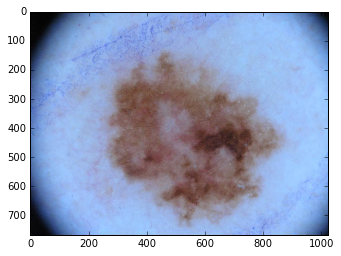

In [27]:
plt.imshow(melanoma_images[0])

In [28]:
melanoma_images[0].shape

(767, 1022, 3)

In [29]:
root 

'/home/iplab/Cancer_predicton/melanoma/'

In [38]:
root = "/home/iplab/Cancer_predicton/gt"

In [39]:
filenames[0][0:-4] + "_segmentation.png"

'ISIC_0000002_segmentation.png'

In [43]:
ground_truth_images = []
for filename in filenames :
    filename = filename[0:-4] + "_segmentation.png"
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    
    ground_truth_images.append(image)
    print(filename)

ISIC_0000002_segmentation.png
ISIC_0000004_segmentation.png
ISIC_0000013_segmentation.png
ISIC_0000022_segmentation.png
ISIC_0000026_segmentation.png
ISIC_0000029_segmentation.png
ISIC_0000030_segmentation.png
ISIC_0000031_segmentation.png
ISIC_0000035_segmentation.png
ISIC_0000036_segmentation.png
ISIC_0000040_segmentation.png
ISIC_0000043_segmentation.png
ISIC_0000046_segmentation.png
ISIC_0000049_segmentation.png
ISIC_0000054_segmentation.png
ISIC_0000056_segmentation.png
ISIC_0000074_segmentation.png
ISIC_0000077_segmentation.png
ISIC_0000078_segmentation.png
ISIC_0000139_segmentation.png
ISIC_0000140_segmentation.png
ISIC_0000141_segmentation.png
ISIC_0000142_segmentation.png
ISIC_0000143_segmentation.png
ISIC_0000145_segmentation.png
ISIC_0000146_segmentation.png
ISIC_0000147_segmentation.png
ISIC_0000148_segmentation.png
ISIC_0000149_segmentation.png
ISIC_0000150_segmentation.png
ISIC_0000151_segmentation.png
ISIC_0000152_segmentation.png
ISIC_0000153_segmentation.png
ISIC_00001

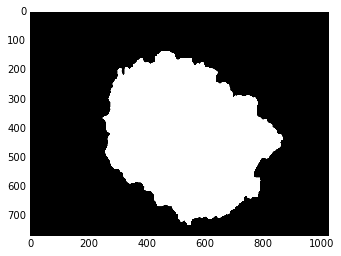

In [44]:
plt.imshow(ground_truth_images[0], cmap = "gray")

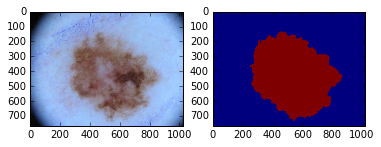

In [46]:
plt.subplot(1,2,1)
plt.imshow(melanoma_images[0])
plt.subplot(1,2,2)
plt.imshow(ground_truth_images[0])

In [48]:
np.unique(ground_truth_images[1])

array([  0, 255], dtype=uint8)

In [50]:
def segment_image(color_image, ground_truth) :
    shape = ground_truth.shape
    for i in range (shape[0]) :
        for j in range (shape[1]):
            if(ground_truth[i][j] == 0):
                color_image[i][j] = [0,0,0]
    return color_image

In [62]:
image = segment_image(melanoma_images[0],ground_truth_images[0])

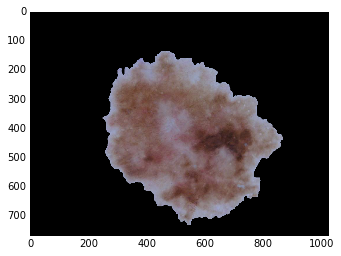

In [63]:
plt.imshow(image)

In [65]:
len(np.unique(image))

188

In [70]:
segmented_melanoma_images = []
for i in range (len(melanoma_images)) :
    shape = melanoma_images[i].shape
    segmented_image = np.multiply(ground_truth_images[i].reshape(shape[0],shape[1],1), melanoma_images[i])
    segmented_melanoma_images.append(segmented_image)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [66]:
image = np.multiply(ground_truth_images[0].reshape(767,1022,1), melanoma_images[0])

In [67]:
len(np.unique(image))

188

In [59]:
reshape = ground_truth_images[0].reshape(767,1022,1)

In [61]:
np.unique(reshape)

array([  0, 255], dtype=uint8)

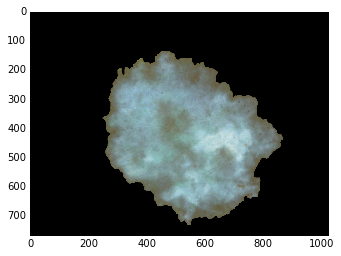

In [58]:
plt.imshow(image)

In [71]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/iplab/Cancer_predicton/others/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [72]:
filenames

['ISIC_0000000.jpg',
 'ISIC_0000001.jpg',
 'ISIC_0000003.jpg',
 'ISIC_0000006.jpg',
 'ISIC_0000007.jpg',
 'ISIC_0000008.jpg',
 'ISIC_0000009.jpg',
 'ISIC_0000010.jpg',
 'ISIC_0000011.jpg',
 'ISIC_0000012.jpg',
 'ISIC_0000014.jpg',
 'ISIC_0000015.jpg',
 'ISIC_0000016.jpg',
 'ISIC_0000017.jpg',
 'ISIC_0000018.jpg',
 'ISIC_0000019.jpg',
 'ISIC_0000020.jpg',
 'ISIC_0000021.jpg',
 'ISIC_0000023.jpg',
 'ISIC_0000024.jpg',
 'ISIC_0000025.jpg',
 'ISIC_0000027.jpg',
 'ISIC_0000028.jpg',
 'ISIC_0000032.jpg',
 'ISIC_0000034.jpg',
 'ISIC_0000037.jpg',
 'ISIC_0000038.jpg',
 'ISIC_0000039.jpg',
 'ISIC_0000041.jpg',
 'ISIC_0000042.jpg',
 'ISIC_0000044.jpg',
 'ISIC_0000045.jpg',
 'ISIC_0000047.jpg',
 'ISIC_0000048.jpg',
 'ISIC_0000050.jpg',
 'ISIC_0000051.jpg',
 'ISIC_0000052.jpg',
 'ISIC_0000053.jpg',
 'ISIC_0000055.jpg',
 'ISIC_0000057.jpg',
 'ISIC_0000059.jpg',
 'ISIC_0000061.jpg',
 'ISIC_0000062.jpg',
 'ISIC_0000063.jpg',
 'ISIC_0000064.jpg',
 'ISIC_0000065.jpg',
 'ISIC_0000066.jpg',
 'ISIC_000006

In [73]:
other_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    
    other_images.append(image)
    print(filename)

ISIC_0000000.jpg
ISIC_0000001.jpg
ISIC_0000003.jpg
ISIC_0000006.jpg
ISIC_0000007.jpg
ISIC_0000008.jpg
ISIC_0000009.jpg
ISIC_0000010.jpg
ISIC_0000011.jpg
ISIC_0000012.jpg
ISIC_0000014.jpg
ISIC_0000015.jpg
ISIC_0000016.jpg
ISIC_0000017.jpg
ISIC_0000018.jpg
ISIC_0000019.jpg
ISIC_0000020.jpg
ISIC_0000021.jpg
ISIC_0000023.jpg
ISIC_0000024.jpg
ISIC_0000025.jpg
ISIC_0000027.jpg
ISIC_0000028.jpg
ISIC_0000032.jpg
ISIC_0000034.jpg
ISIC_0000037.jpg
ISIC_0000038.jpg
ISIC_0000039.jpg
ISIC_0000041.jpg
ISIC_0000042.jpg
ISIC_0000044.jpg
ISIC_0000045.jpg
ISIC_0000047.jpg
ISIC_0000048.jpg
ISIC_0000050.jpg
ISIC_0000051.jpg
ISIC_0000052.jpg
ISIC_0000053.jpg
ISIC_0000055.jpg
ISIC_0000057.jpg
ISIC_0000059.jpg
ISIC_0000061.jpg
ISIC_0000062.jpg
ISIC_0000063.jpg
ISIC_0000064.jpg
ISIC_0000065.jpg
ISIC_0000066.jpg
ISIC_0000067.jpg
ISIC_0000068.jpg
ISIC_0000069.jpg
ISIC_0000071.jpg
ISIC_0000072.jpg
ISIC_0000073.jpg
ISIC_0000075.jpg
ISIC_0000079.jpg
ISIC_0000080.jpg
ISIC_0000081.jpg
ISIC_0000082.jpg
ISIC_0000085.j

In [74]:
root = "/home/iplab/Cancer_predicton/gt"

In [76]:
ground_truth_images_others = []
for filename in filenames :
    filename = filename[0:-4] + "_segmentation.png"
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    
    ground_truth_images_others.append(image)
    print(filename)

ISIC_0000000_segmentation.png
ISIC_0000001_segmentation.png
ISIC_0000003_segmentation.png
ISIC_0000006_segmentation.png
ISIC_0000007_segmentation.png
ISIC_0000008_segmentation.png
ISIC_0000009_segmentation.png
ISIC_0000010_segmentation.png
ISIC_0000011_segmentation.png
ISIC_0000012_segmentation.png
ISIC_0000014_segmentation.png
ISIC_0000015_segmentation.png
ISIC_0000016_segmentation.png
ISIC_0000017_segmentation.png
ISIC_0000018_segmentation.png
ISIC_0000019_segmentation.png
ISIC_0000020_segmentation.png
ISIC_0000021_segmentation.png
ISIC_0000023_segmentation.png
ISIC_0000024_segmentation.png
ISIC_0000025_segmentation.png
ISIC_0000027_segmentation.png
ISIC_0000028_segmentation.png
ISIC_0000032_segmentation.png
ISIC_0000034_segmentation.png
ISIC_0000037_segmentation.png
ISIC_0000038_segmentation.png
ISIC_0000039_segmentation.png
ISIC_0000041_segmentation.png
ISIC_0000042_segmentation.png
ISIC_0000044_segmentation.png
ISIC_0000045_segmentation.png
ISIC_0000047_segmentation.png
ISIC_00000

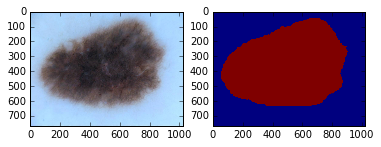

In [77]:
plt.subplot(1,2,1)
plt.imshow(other_images[0])
plt.subplot(1,2,2)
plt.imshow(ground_truth_images_others[0])

In [78]:
segmented_other_images = []
for i in range (len(other_images)) :
    shape = other_images[i].shape
    segmented_image = np.multiply(ground_truth_images_others[i].reshape(shape[0],shape[1],1), other_images[i])
    segmented_other_images.append(segmented_image)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [79]:
np.save("segmented_others.npy",np.array(segmented_other_images))

In [80]:
np.save('segmented_melanoma.npy', np.array(segmented_melanoma_images))

In [ ]:
np.save('melanoma_images.npy',np.array)